In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy.stats import mode

In [49]:
df1 = pd.read_csv('dataset_1.csv').dropna()

In [50]:
df1['starttime'] = pd.to_datetime(df1['starttime'])
df1['stoptime'] = pd.to_datetime(df1['stoptime'])
df1.dtypes

tripduration                 int64
starttime           datetime64[ns]
stoptime            datetime64[ns]
start_station_id             int64
end_station_id               int64
bikeid                       int64
usertype                     int64
birthyear                  float64
gender                       int64
dtype: object

In [51]:
df1

,tripduration,starttime,stoptime,start_station_id,end_station_id,bikeid,usertype,birthyear,gender
1,1521,2013-06-01 00:01:00,2013-06-01 00:26:00,2008,310,15567,1,1983.0,1
3,1829,2013-06-01 00:03:00,2013-06-01 00:34:00,265,436,15234,1,1984.0,1
4,899,2013-06-01 00:09:00,2013-06-01 00:24:00,494,494,15539,1,1967.0,1
5,395,2013-06-01 00:11:00,2013-06-01 00:18:00,312,410,19477,1,1970.0,1
6,424,2013-06-01 00:11:00,2013-06-01 00:18:00,494,519,18489,1,1957.0,1
7,1077,2013-06-01 00:12:00,2013-06-01 00:30:00,482,480,16963,1,1982.0,1
8,689,2013-06-02 00:12:00,2013-06-01 00:24:00,439,317,16164,1,1982.0,1


In [70]:
df1['date_minus_time'] = df1["starttime"].apply( lambda df1 : 
datetime(year=df1.year, month=df1.month, day=df1.day))	
df1.set_index(df1["date_minus_time"], inplace=True)

In [60]:
resampled_df = pd.DataFrame()
resampled_df['tripduration'] = df1['tripduration'].resample('D').mean()
resampled_df['birthyear'] = df1['birthyear'].resample('D').mean()
resampled_df['gender'] = df1['gender'].resample('D').mean() #mode()
resampled_df['usertype'] = df1['usertype'].resample('D').mean()

In [61]:
resampled_df

,tripduration,birthyear,gender,usertype
date_minus_time,,,,
2013-06-01,1024.166667,1973.833333,1,1
2013-06-02,689.000000,1982.000000,1,1


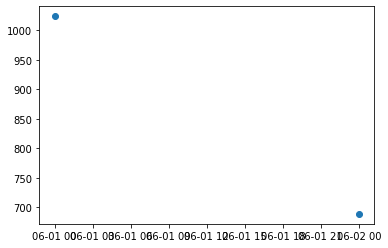

In [69]:
plt.plot(resampled_df.index, resampled_df['tripduration'],'o')